In [4]:
import RidgeTrough.lines as lines
from RidgeTrough.lines import grads, max_grads, ridge_gif
from RidgeTrough.cdf_data import CDFData
import matplotlib.pyplot as plt
%load_ext autoreload
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
%autoreload

## Load data

In [6]:
DATA_ROOT = r"E:\WeatherData"
year = 2000
hgt_path = os.path.join(DATA_ROOT,"hgts",f'hgt.{year}.nc')
uwnd_path = os.path.join(DATA_ROOT,"u_winds",f'uwnd.{year}.nc')
vwnd_path = os.path.join(DATA_ROOT,"v_winds",f'vwnd.{year}.nc')
cdf = CDFData(hgt_path = hgt_path)

INFO:root: 07:17:19 - Retrieved 2000 hgt data


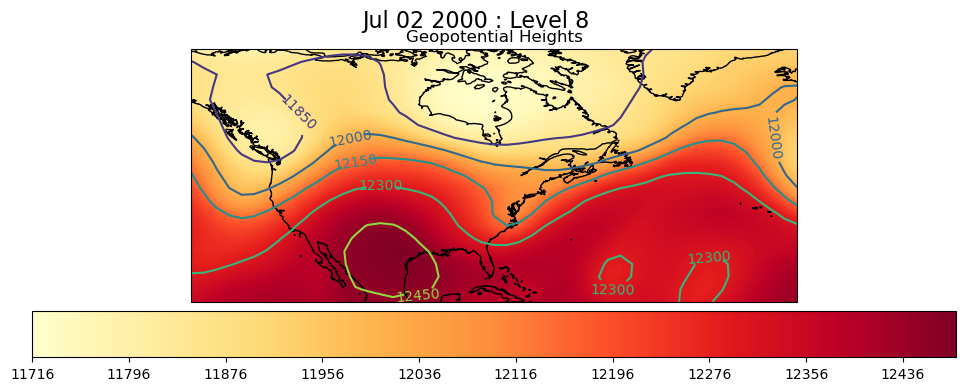

In [8]:
cdf.plot('hgts', (7,2), 8)
plt.show()

## Identify Max Gradient line

In [9]:
%matplotlib notebook
# %matplotlib inline

In [10]:
hgts = cdf.hgts[...,:(len(cdf.lats) //2), :]
g = grads(hgts)

getting gradients: 100%|████████████████████████████████████████████████████████████| 366/366 [00:02<00:00, 131.96it/s]


<IPython.core.display.Javascript object>


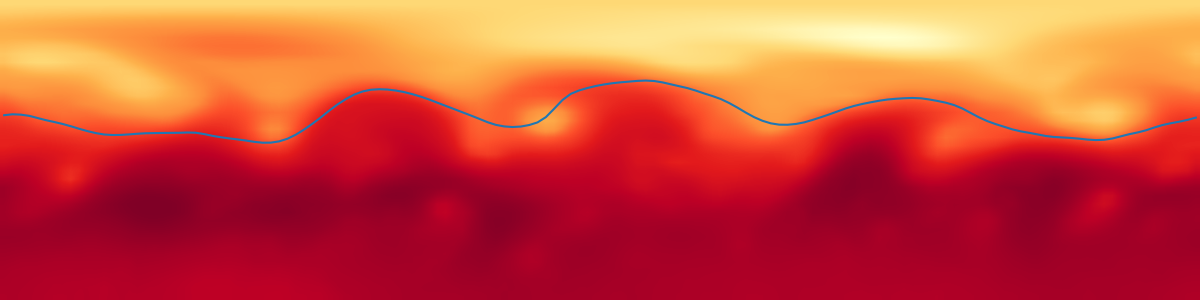

In [11]:
m = max_grads(g, sigma=(1.,1.,1.))
ridge_gif(hgts, m, level=5)

## Peak/Trough finding

In [20]:
%matplotlib inline

In [13]:
hgt_path = r"E:\WeatherData\hgts"
data = lines.FullCDFData(hgt_path, yr_range=(1985, 1990), smooth_sigma=(1.,3.,2.))

In [14]:
finder = lines.CritPointFinder(prominence=1.5, distance=4)
peaks, troughs = finder(data)

In [21]:
day = 50
level = 5
lines.plot_crit_points(peaks, troughs, data, day, level)
plt.show()

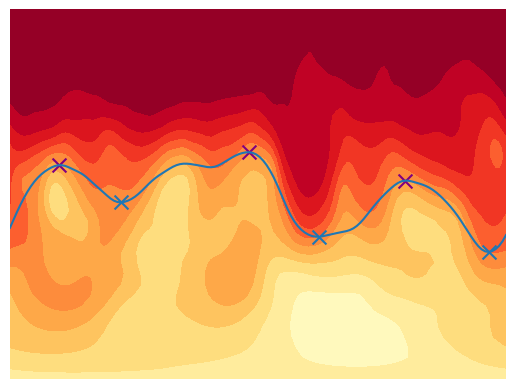

In [20]:
day = 50
level = 5
lines.plot_crit_points(peaks, troughs, data, day, level)
plt.plot(data.grad_lines[day, level])
plt.show()

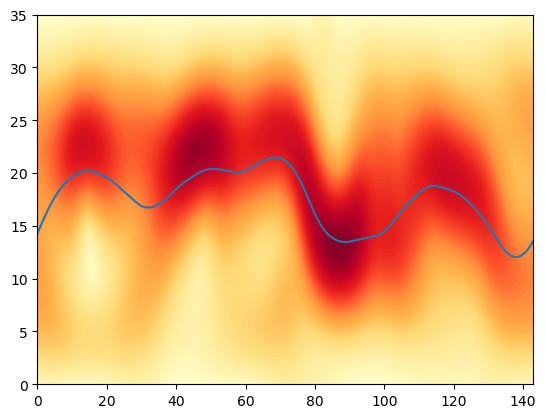

In [21]:
plt.contourf(data.grads[day, level], cmap='YlOrRd', levels=100)
plt.plot(data.grad_lines[day, level])

In [19]:
from matplotlib.animation import FuncAnimation
import numpy as np

In [20]:
def offset_data(crit, data, day, level):
    x = crit[day][level]
    y = data.grad_lines[day, level][crit[day][level]]
    return np.vstack((x,y)).T
    
def crit_gif(peaks, troughs, data, fig_width=12, level=5):
    hgts = data.hgts
    AR = hgts.shape[-1] / hgts.shape[-2]
    fig_height = fig_width / AR
    fig, ax = plt.subplots(figsize=(fig_width,fig_height))
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
    ax.axis('off')
    h = hgts[0, level, ...]
    im = ax.imshow(lines.norm(h), cmap='YlOrRd', interpolation='bilinear')
    ln1 = ax.scatter(peaks[0][level], data.grad_lines[0, level][peaks[0][level]])
    ln2 = ax.scatter(troughs[0][level], data.grad_lines[0, level][troughs[0][level]])

    def init():
        hgts_i = hgts[0, level, ...]
        # ln1.set_offsets(peaks[0][level], data.grad_lines[0, level][peaks[0][level]])
        ln1.set_offsets(offset_data(peaks, data, 0, level))
        ln2.set_offsets(offset_data(troughs, data, 0, level))
        # ln2.set_offsets(troughs[0][level], data.grad_lines[0, level][troughs[0][level]])
        im.set_data(lines.norm(hgts_i))
        return im,ln1,ln2

    def update(frame):
        hgts_i = hgts[frame, level, ...]
        # ln1.set_offsets(peaks[frame][level], data.grad_lines[frame, level][peaks[frame][level]])
        # ln2.set_offsets(troughs[frame][level], data.grad_lines[frame, level][troughs[frame][level]])
        ln1.set_offsets(offset_data(peaks, data, frame, level))
        ln2.set_offsets(offset_data(troughs, data, frame, level))
        im.set_data(lines.norm(hgts_i))
        return im,ln1,ln2

    return FuncAnimation(fig, update, frames=range(1,hgts.shape[0]), init_func=init, blit=True)

<IPython.core.display.Javascript object>


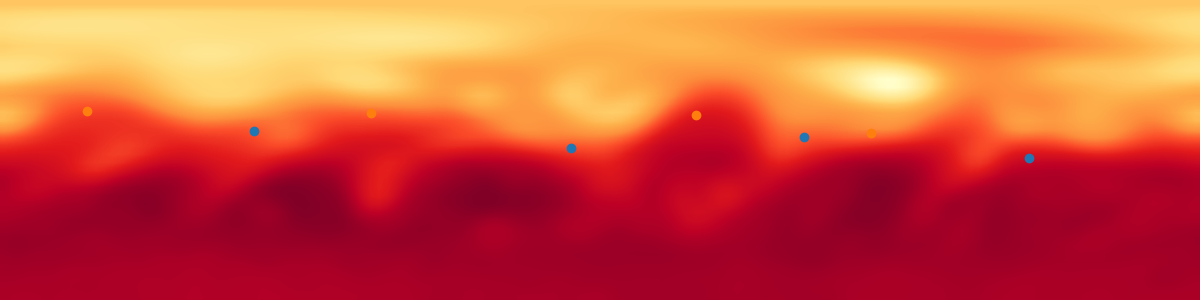

In [21]:
crit_gif(peaks, troughs, data, level=5)